In [7]:
import glob
import numpy as np
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
%matplotlib inline
from matplotlib.font_manager import FontProperties
#from plotnine import *

In [35]:
def do_plot(path, path_to_save, name, n_exp, t, xlab):
    ##
    names = glob.glob(path)
    for i in range(len(names)):
        #
        if i == 0:
            #
            final = pd.read_csv(names[i])
            #
        else:
            #
            curr = pd.read_csv(names[i])
            final = pd.concat([final,curr])
        
    means = final.groupby(name).mean()
    devs = final.groupby(name).std() / np.sqrt(n_exp)
    
    ## PLOT
    x = means.index
    #
    y1 = means["acc_raw_clean"]
    y2 = means["acc_raw_att"]
    y3 = means["acc_acra_att"]
    #
    y1dev = devs["acc_raw_clean"]
    y2dev = devs["acc_raw_att"]
    y3dev = devs["acc_acra_att"]

    f,ax2 = plt.subplots(1,1,sharex=True, facecolor='w')
    sns.set_style("whitegrid")
    # Plot distributions
    ax2.errorbar(x, y1, yerr=y1dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o',linestyle='-',elinewidth=0.9,capsize=5,capthick=0.5)
    ax2.errorbar(x, y2, yerr=y2dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o', linestyle='--',elinewidth=0.9,capsize=5,capthick=0.5)
    ax2.errorbar(x, y3, yerr=y3dev ,ecolor='black', color = sns.xkcd_rgb["black"], fmt = 'o', linestyle=':',elinewidth=0.9,capsize=5,capthick=0.5)
    # Create the legend box
    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    # Add legend and labels
    ax2.legend(labels=["Raw Clean Data", "Raw Attacked Data", "ACRA Attacked Data"],loc='upper right', bbox_to_anchor=(0,0.97,1,0.2), prop={'size': 14})
    ax2.set(xlabel=xlab)
    ax2.set_ylabel("Accuracy")
    # Set size of title and x,y labels
    plt.gcf().autofmt_xdate()
    ax2.tick_params(labelsize=14)
    f.suptitle(t,x=0.5, y=0.93, fontsize=20)
    ax2.xaxis.label.set_size(20)
    ax2.yaxis.label.set_size(20)
    plt.rcParams["figure.figsize"] = (12,9)

    plt.savefig(path_to_save, format='eps', dpi=600)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


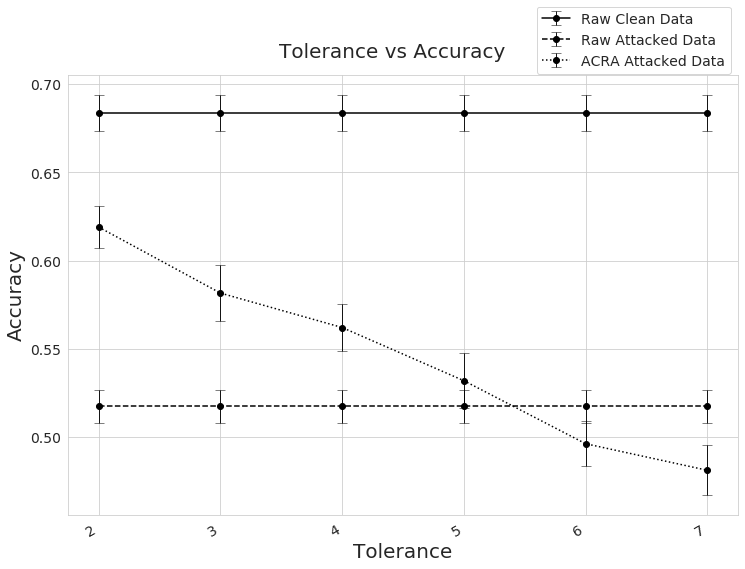

In [36]:
path = "../results/exp_tolerance/*"
path_to_save = "../figs/tolerance.eps"
name = 'tolerance'
n_exp = 10
t = "Tolerance vs Accuracy"
xlab = 'Tolerance'
do_plot(path, path_to_save, name, n_exp, t, xlab)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


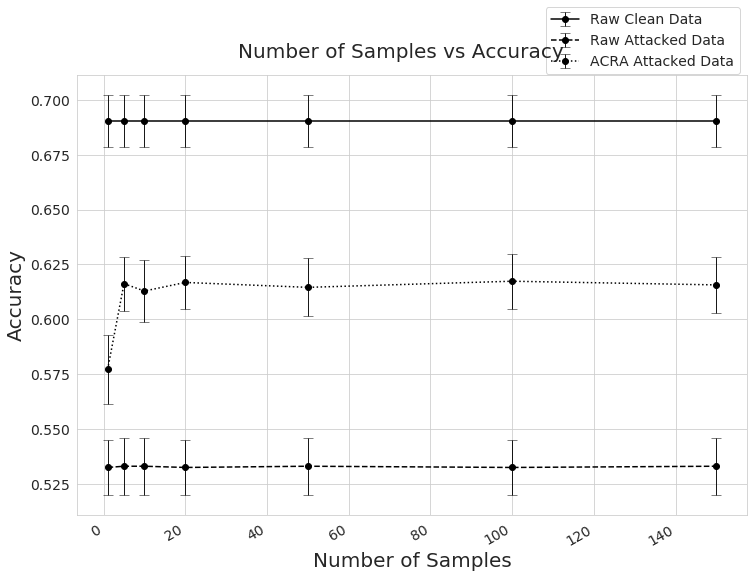

In [37]:
path = "../results/exp_samples/*"
path_to_save = "../figs/n_samples.eps"
name = 'n_samples'
n_exp = 10
t = "Number of Samples vs Accuracy"
xlab = 'Number of Samples'
do_plot(path, path_to_save, name, n_exp, t, xlab)